In [19]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from gensim import corpora, models

speeches_df = pd.read_csv('/Users/kiramaya/Downloads/tokaev_speeches011.csv')

In [20]:

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kiramaya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/kiramaya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
russian_stopwords = set(stopwords.words('russian'))
additional_stopwords = {'это', 'также', 'который', 'которая', 'которые', 'которых', 'что', 'того', 'және', 'біз', 'бұл','үшін', 'будут', 'всей','поэтому', 'потому','свой','свое', 'сво','это','эта','эту'}
russian_stopwords.update(additional_stopwords)






In [43]:
speeches_df['TEXT'].fillna('', inplace=True)



In [44]:
def preprocess_text(text):
    
    text = text.lower()
    
    text = re.sub(r'[^\w\s]', '', text)
    
    tokens = word_tokenize(text)
    
    stemmer = SnowballStemmer(language='russian')

    # Stem each token and remove stopwords
    stemmed_tokens = [stemmer.stem(word) for word in tokens if word not in russian_stopwords]
    
    return stemmed_tokens

In [45]:
preprocessed_speeches = speeches_df['TEXT'].apply(preprocess_text)


In [46]:
dictionary = corpora.Dictionary(preprocessed_speeches.tolist())
corpus = [dictionary.doc2bow(text) for text in preprocessed_speeches]

In [47]:
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)


In [48]:
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.014*"друг" + 0.011*"след" + 0.010*"правительств" + 0.008*"алмат" + 0.008*"казахста"')
(1, '0.017*"наш" + 0.012*"государств" + 0.009*"нов" + 0.008*"казахста" + 0.006*"работ"')
(2, '0.010*"государств" + 0.009*"правительств" + 0.009*"поруча" + 0.008*"обществ" + 0.007*"возможн"')
(3, '0.008*"регион" + 0.008*"национальн" + 0.006*"ситуац" + 0.005*"государств" + 0.005*"прояв"')
(4, '0.012*"стран" + 0.009*"сво" + 0.008*"террорист" + 0.008*"наш" + 0.007*"вопрос"')
(5, '0.014*"безопасн" + 0.011*"стран" + 0.010*"орган" + 0.010*"гражда" + 0.009*"одкб"')
(6, '0.015*"наш" + 0.009*"врем" + 0.009*"задач" + 0.008*"конкретн" + 0.007*"государствен"')
(7, '0.010*"наш" + 0.007*"обществен" + 0.007*"государствен" + 0.006*"должн" + 0.006*"гражда"')
(8, '0.007*"операц" + 0.006*"решен" + 0.006*"власт" + 0.006*"люд" + 0.005*"стран"')
(9, '0.015*"казахста" + 0.008*"президент" + 0.006*"народ" + 0.006*"рост" + 0.005*"действ"')


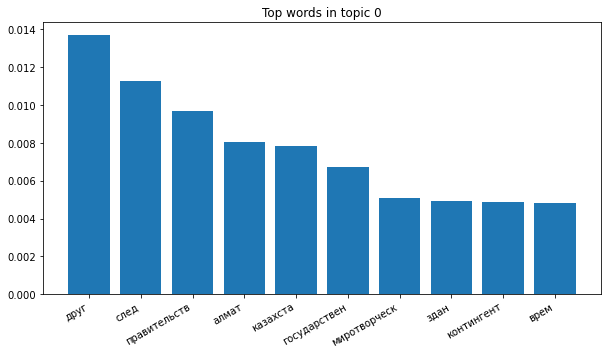

<Figure size 432x288 with 0 Axes>

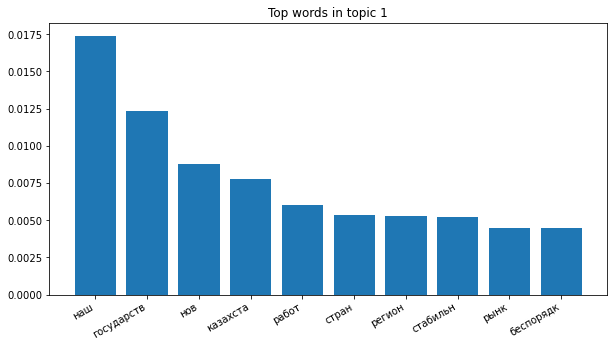

<Figure size 432x288 with 0 Axes>

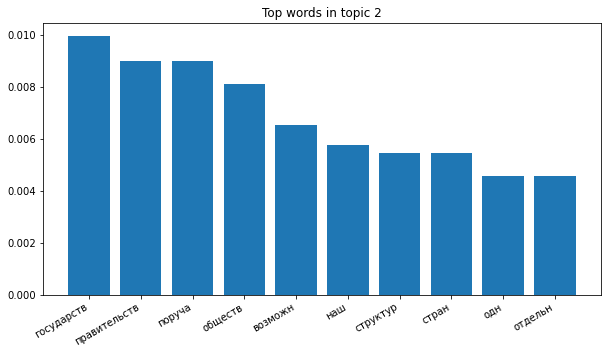

<Figure size 432x288 with 0 Axes>

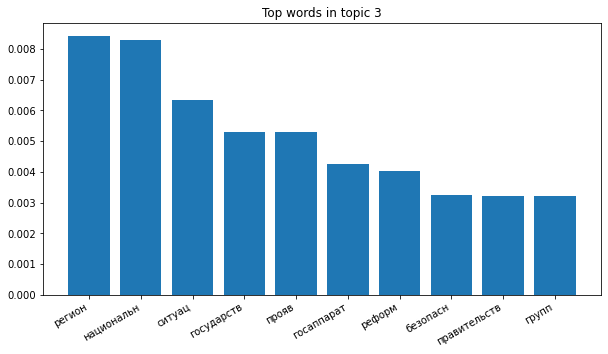

<Figure size 432x288 with 0 Axes>

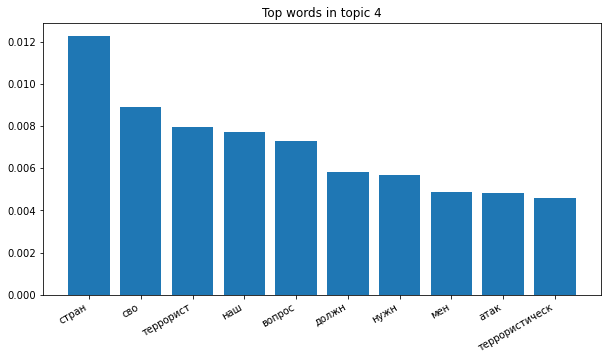

<Figure size 432x288 with 0 Axes>

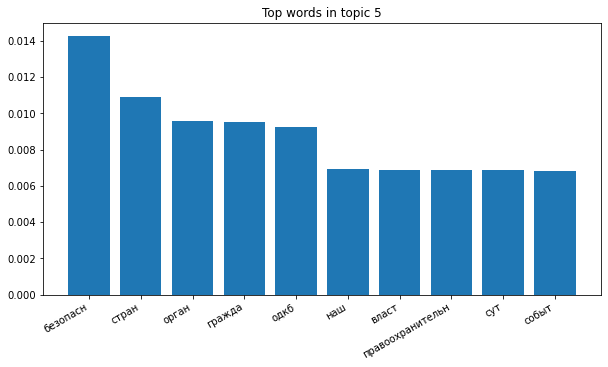

<Figure size 432x288 with 0 Axes>

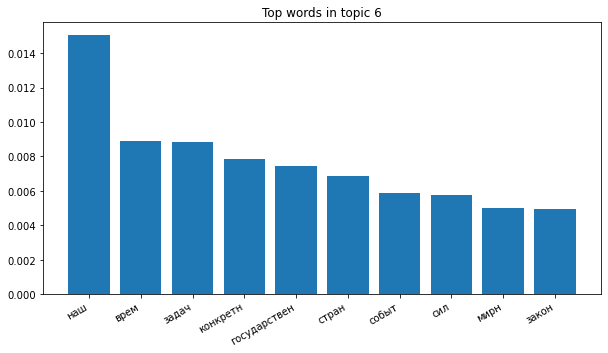

<Figure size 432x288 with 0 Axes>

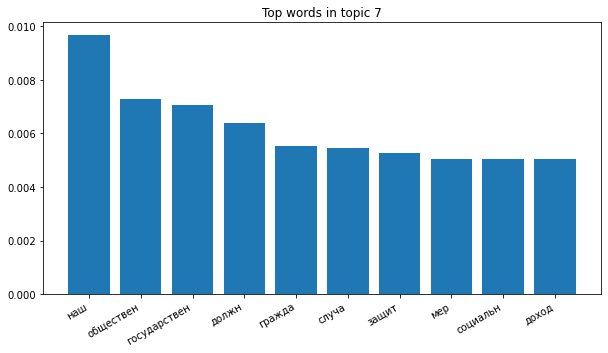

<Figure size 432x288 with 0 Axes>

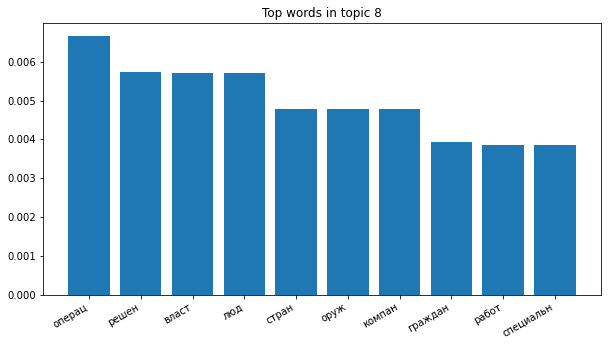

<Figure size 432x288 with 0 Axes>

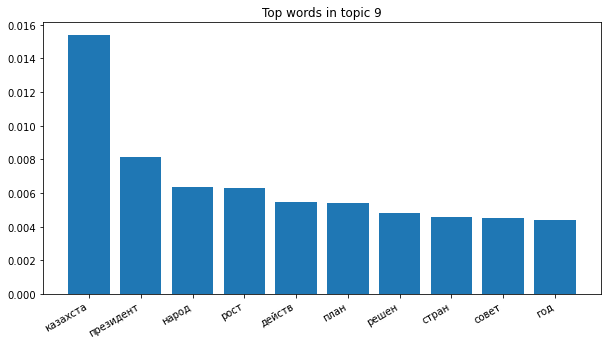

<Figure size 432x288 with 0 Axes>

In [59]:
import matplotlib.pyplot as plt

def plot_top_words(lda_model, nb_topics):
    for i, topic in enumerate(lda_model.show_topics(num_topics=nb_topics, formatted=False)):
        top_words = [word for word, _ in topic[1]]
        weights = [weight for _, weight in topic[1]]
        
        plt.figure(figsize=(10, 5))
        plt.title(f"Top words in topic {i}")
        plt.bar(top_words, weights)
        plt.xticks(rotation=30, ha="right")
        plt.show()
        
        plt.savefig(f"topic_{i}_words.png", bbox_inches='tight')
        

# Visualize the top words of each topic
plot_top_words(lda_model, 10)



In [50]:
topic_table = pd.DataFrame(columns=['Topic ID', 'Top Words'])


In [51]:
topic_data = []




In [52]:
for topic_id, topic_words in topics:
    topic_data.append({'Topic ID': topic_id, 'Top Words': topic_words})

In [53]:

topic_table = pd.DataFrame(topic_data)
print(topic_table)

   Topic ID                                          Top Words
0         0  0.014*"друг" + 0.011*"след" + 0.010*"правитель...
1         1  0.017*"наш" + 0.012*"государств" + 0.009*"нов"...
2         2  0.010*"государств" + 0.009*"правительств" + 0....
3         3  0.008*"регион" + 0.008*"национальн" + 0.006*"с...
4         4  0.012*"стран" + 0.009*"сво" + 0.008*"террорист...
5         5  0.014*"безопасн" + 0.011*"стран" + 0.010*"орга...
6         6  0.015*"наш" + 0.009*"врем" + 0.009*"задач" + 0...
7         7  0.010*"наш" + 0.007*"обществен" + 0.007*"госуд...
8         8  0.007*"операц" + 0.006*"решен" + 0.006*"власт"...
9         9  0.015*"казахста" + 0.008*"президент" + 0.006*"...


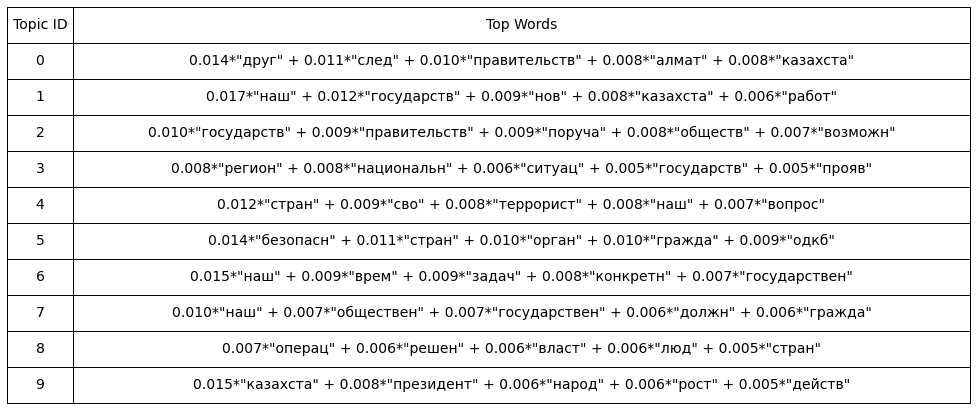

In [54]:
plt.figure(figsize=(12, 6))
table = plt.table(cellText=topic_table.values,
                  colLabels=topic_table.columns,
                  loc='center',
                  cellLoc='center',
                  fontsize=14)  # Increase font size

table.auto_set_font_size(False)
table.set_fontsize(14)  # Set font size explicitly
table.scale(1,3)  # Scale the table size

# Specify the widths of the columns
table.auto_set_column_width(0)  # Set the width of the first column automatically
table.auto_set_column_width([1])  # Set the width of the second column automatically

plt.axis('off')
plt.savefig('public_officials123.png', bbox_inches='tight')
plt.show()

In [55]:
import networkx as nx

def build_occurrence_network(lda_model, nb_topics):
    # Create an empty graph
    G = nx.Graph()
    
    # Extract top words for each topic
    for i, topic in enumerate(lda_model.show_topics(num_topics=nb_topics, formatted=False)):
        top_words = [word for word, _ in topic[1]]
        
        # Add edges between words within the same topic
        for word1 in top_words:
            for word2 in top_words:
                if word1 != word2:
                    if G.has_edge(word1, word2):
                        # Increment edge weight if edge already exists
                        G[word1][word2]['weight'] += 1
                    else:
                        # Add a new edge with weight 1
                        G.add_edge(word1, word2, weight=1)
    
    return G


In [56]:
occurrence_network = build_occurrence_network(lda_model, 10)

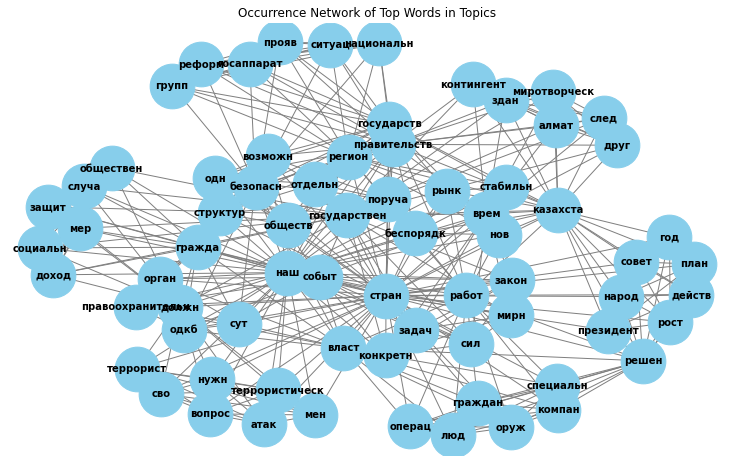

In [61]:
plt.figure(figsize=(10, 6))
pos = nx.kamada_kawai_layout(occurrence_network)  # Position nodes using Kamada-Kawai layout algorithm
nx.draw(occurrence_network, pos, with_labels=True, font_size=10, node_color='skyblue', node_size=2000, edge_color='gray', linewidths=1, font_weight='bold')
plt.title("Occurrence Network of Top Words in Topics")
plt.show()